In [1]:
pip install pandas mlxtend matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r"C:\Users\PRACHI TIWARI\OneDrive\Documents\Product_Data.csv")

In [5]:
data['Purchase Date'] = pd.to_datetime(data['Purchase_Date'])

In [6]:
print(data.head())

  Transaction_id    Item  Item_Quantity Purchase_Date  Payment_Mode  \
0           T001   Bread              5      1/1/2024          Cash   
1           T002  Butter              4      2/2/2024  Credit Card    
2           T003   Bread              7      1/3/2024          Cash   
3           T004  Butter              6      2/4/2024  Credit Card    
4           T005    Milk              8     12/5/2024          Cash   

  Purchase Date  
0    2024-01-01  
1    2024-02-02  
2    2024-01-03  
3    2024-02-04  
4    2024-12-05  


In [7]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction_id  31 non-null     object        
 1   Item            31 non-null     object        
 2   Item_Quantity   31 non-null     int64         
 3   Purchase_Date   31 non-null     object        
 4   Payment_Mode    31 non-null     object        
 5   Purchase Date   31 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.6+ KB
None


In [8]:
print("\nUnique Payment Modes:", data['Payment_Mode'].unique())


Unique Payment Modes: ['Cash' 'Credit Card ']


In [9]:
basket = data.groupby(['Transaction_id', 'Item'])['Item_Quantity'].sum().unstack().fillna(0)


In [10]:
basket = basket.map(lambda x: 1 if x > 0 else 0)
print("\nBasket Preview:")
print(basket.head())


Basket Preview:
Item            Bread  Butter  Charger  Cold Drinks  Milk
Transaction_id                                           
T001                1       0        0            0     0
T002                0       1        0            0     0
T003                1       0        0            0     0
T004                0       1        0            0     0
T005                0       0        0            0     1


In [11]:
def analyze_payment_mode(data, mode, min_support=0.01, metric="lift", min_threshold=1.0):
    
    subset = data[data['Payment_Mode'] == mode]
    basket_subset = subset.groupby(['Transaction_id', 'Item'])['Item_Quantity'].sum().unstack().fillna(0)
    
    
    basket_subset = basket_subset.map(lambda x: x > 0).astype(bool)
    

    frequent_itemsets = apriori(basket_subset, min_support=min_support, use_colnames=True)
    frequent_itemsets['num_itemsets'] = frequent_itemsets['itemsets'].apply(len)
    
    rules = association_rules(
        frequent_itemsets,
        metric=metric,
        min_threshold=min_threshold,
        num_itemsets=frequent_itemsets['num_itemsets']
    )
    
    print(f"\n--- {mode} Mode Analysis ---")
    print(f"Frequent Itemsets:\n{frequent_itemsets.head()}")
    print(f"Association Rules:\n{rules.head()}")
    
    return frequent_itemsets, rules

In [12]:
pip show mlxtend

Name: mlxtendNote: you may need to restart the kernel to use updated packages.

Version: 0.23.3
Summary: Machine Learning Library Extensions
Home-page: https://github.com/rasbt/mlxtend
Author: 
Author-email: Sebastian Raschka <mail@sebastianraschka.com>
License: BSD 3-Clause
Location: C:\Users\PRACHI TIWARI\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: joblib, matplotlib, numpy, pandas, scikit-learn, scipy
Required-by: 


In [13]:
pip install -U mlxtend

Note: you may need to restart the kernel to use updated packages.


In [14]:
modes = data['Payment_Mode'].unique()
mode_results = {}

for mode in modes:
    mode_results[mode] = analyze_payment_mode(data, mode)



--- Cash Mode Analysis ---
Frequent Itemsets:
   support       itemsets  num_itemsets
0   0.4375        (Bread)             1
1   0.1875       (Butter)             1
2   0.1875  (Cold Drinks)             1
3   0.1875         (Milk)             1
Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []

--- Credit Card  Mode Analysis ---
Frequent Itemsets:
   support       itemsets  num_itemsets
0      0.4       (Butter)             1
1      0.2      (Charger)             1
2      0.2  (Cold Drinks)             1
3      0.2         (Milk)             1
Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [15]:
print(data['Purchase_Date'].dtype)

object


In [16]:
data['Purchase_Date'] = pd.to_datetime(data['Purchase_Date'])

In [17]:
data['Month'] = data['Purchase_Date'].dt.to_period('M')

In [18]:
monthly_sales = data.groupby(['Month', 'Item'])['Item_Quantity'].sum().reset_index()

In [19]:
print("\nMonthly Trends (Item Quantities):")
print(monthly_sales.head())


Monthly Trends (Item Quantities):
     Month         Item  Item_Quantity
0  2024-01        Bread             16
1  2024-02        Bread              5
2  2024-02       Butter             10
3  2024-02  Cold Drinks              6
4  2024-04       Butter              5


In [20]:
top_items = data.groupby('Item')['Item_Quantity'].sum().nlargest(5).index
top_items_sales = monthly_sales[monthly_sales['Item'].isin(top_items)]

Top Items: Index(['Butter', 'Milk', 'Cold Drinks', 'Bread', 'Charger'], dtype='object', name='Item')
Top Items Sales (Preview):
      Month         Item  Item_Quantity
0  2024-01        Bread             16
1  2024-02        Bread              5
2  2024-02       Butter             10
3  2024-02  Cold Drinks              6
4  2024-04       Butter              5


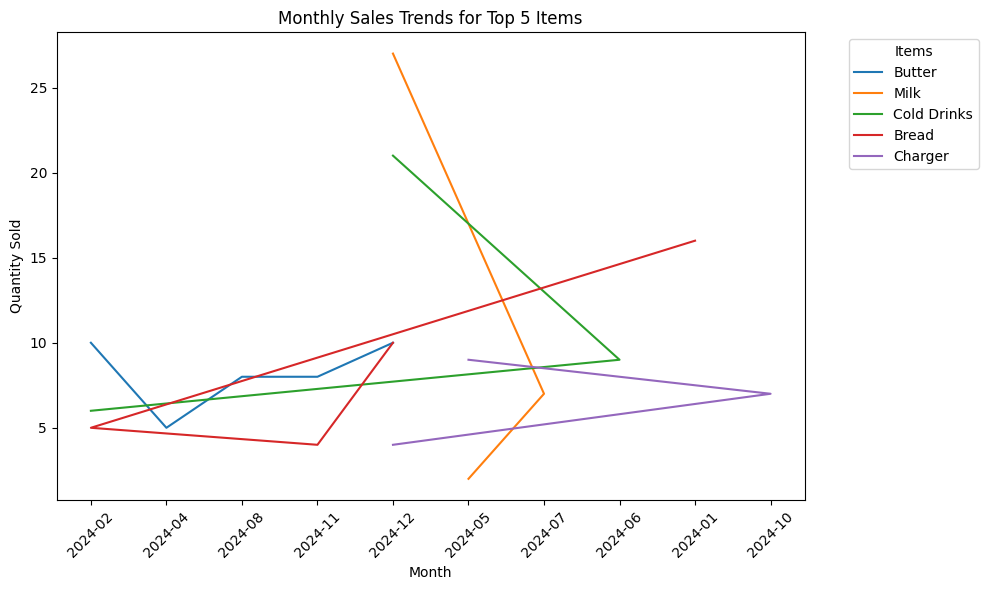

In [21]:
import matplotlib.pyplot as plt
print("Top Items:", top_items)
print("Top Items Sales (Preview):\n", top_items_sales.head())
plt.figure(figsize=(10, 6))

for item in top_items:
    item_sales = top_items_sales[top_items_sales['Item'] == item]
    plt.plot(
        item_sales['Month'].astype(str),  
        item_sales['Item_Quantity'],     
        label=item                      
    )

plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.title("Monthly Sales Trends for Top 5 Items")
plt.xticks(rotation=45)
plt.legend(title='Items', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [22]:

basket = basket.map(lambda x: 1 if x > 0 else 0).astype(bool)


frequent_itemsets_full = apriori(basket, min_support=0.01, use_colnames=True)


frequent_itemsets_full['num_itemsets'] = frequent_itemsets_full['itemsets'].apply(len)

rules_full = association_rules(
    frequent_itemsets_full, 
    metric="lift", 
    min_threshold=1.0,
    num_itemsets=frequent_itemsets_full['num_itemsets']
)
print(rules_full.head())


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [23]:
top_items = data.groupby('Item')['Item_Quantity'].sum().nlargest(5).index
top_items_sales = monthly_sales[monthly_sales['Item'].isin(top_items)]

In [24]:
print("\n--- Overall Analysis ---")
print(f"Frequent Itemsets:\n{frequent_itemsets_full.head()}")
print(f"Association Rules:\n{rules_full.head()}")


--- Overall Analysis ---
Frequent Itemsets:
    support       itemsets  num_itemsets
0  0.225806        (Bread)             1
1  0.290323       (Butter)             1
2  0.096774      (Charger)             1
3  0.193548  (Cold Drinks)             1
4  0.193548         (Milk)             1
Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [25]:
rules_full['lift'] = pd.to_numeric(rules_full['lift'], errors='coerce')

top_rules_full = rules_full.nlargest(10, 'lift')

print(top_rules_full)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []
